In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.pyplot import figure

In [3]:
dataset=pd.read_csv("./g.csv",index_col="Date",parse_dates=True)

<AxesSubplot:xlabel='Date'>

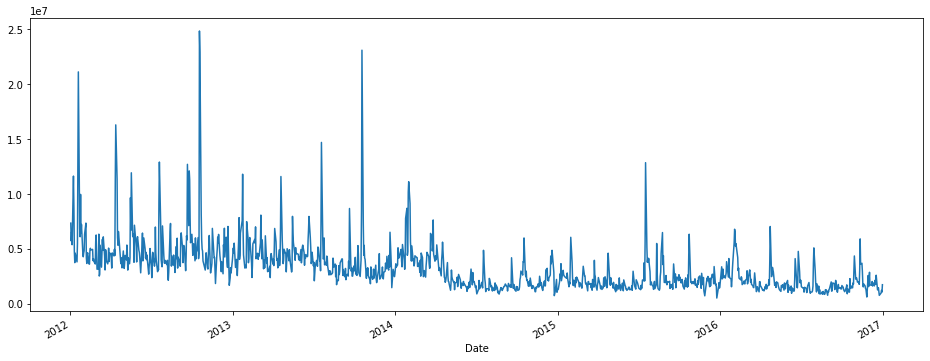

In [4]:
dataset["Volume"].plot(figsize=(16,6))

In [5]:
dataset["Volume"]=dataset["Volume"].astype(float)

In [6]:
dataset.rolling(7).mean().head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03         NaN         NaN         NaN         NaN         NaN   
2012-01-04         NaN         NaN         NaN         NaN         NaN   
2012-01-05         NaN         NaN         NaN         NaN         NaN   
2012-01-06         NaN         NaN         NaN         NaN         NaN   
2012-01-09         NaN         NaN         NaN         NaN         NaN   
2012-01-10         NaN         NaN         NaN         NaN         NaN   
2012-01-11  324.538823  326.938368  320.196629  322.771345  322.771345   
2012-01-12  322.985844  324.417271  318.346924  320.213789  320.213789   
2012-01-13  320.213789  321.321320  315.518380  317.118548  317.118548   
2012-01-17  318.058062  319.034031  313.334054  314.942801  314.942801   
2012-01-18  315.732880  317.175031  311.355647  313.719434  313.719434   
2012-01-19  315.338915  316.745318  312.087093  314.942801  314.942801   
2012-01-20  312.534681  313.685115  309.569576  312.286573  312.286573   
2012-01-23  309.853428  310.772919  306.855434  309.395107  309.395107   
2012-01-24  306.643075  307.540401  303.387678  305.912340  305.912340   
2012-01-25  303.157445  304.091239  299.478054  301.944087  301.944087   
2012-01-26  298.867440  299.979985  295.107252  297.619760  297.619760   
2012-01-27  294.874163  296.141859  291.332764  293.835262  293.835262   
2012-01-30  290.373945  291.781067  287.181471  289.410836  289.410836   
2012-01-31  289.835549  291.280566  286.713143  288.990413  288.990413   

                  Volume  
Date                      
2012-01-03           NaN  
2012-01-04           NaN  
2012-01-05           NaN  
2012-01-06           NaN  
2012-01-09           NaN  
2012-01-10           NaN  
2012-01-11  7.174104e+06  
2012-01-12  6.659962e+06  
2012-01-13  6.501064e+06  
2012-01-17  6.108999e+06  
2012-01-18  6.128637e+06  
2012-01-19  6.266413e+06  
2012-01-20  8.030561e+06  
2012-01-23  8.319672e+06  
2012-01-24  8.656649e+06  
2012-01-25  9.421712e+06  
2012-01-26  9.797593e+06  
2012-01-27  1.004186e+07  
2012-01-30  8.907341e+06  
2012-01-31  6.500065e+06

<AxesSubplot:xlabel='Date'>

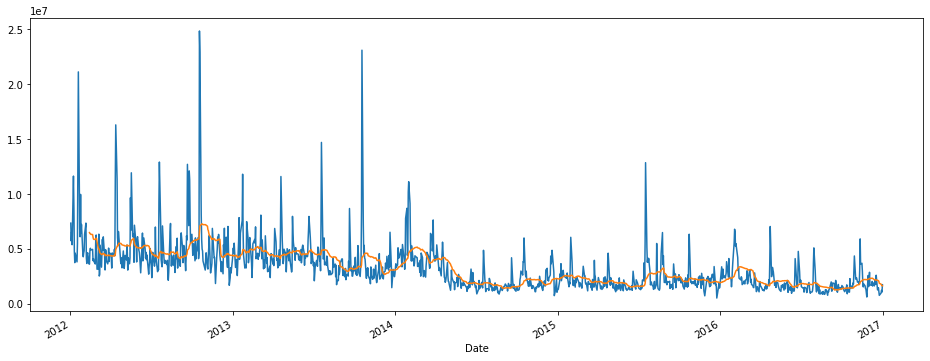

In [7]:
dataset['Volume'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Volume'].plot()

<AxesSubplot:xlabel='Date'>

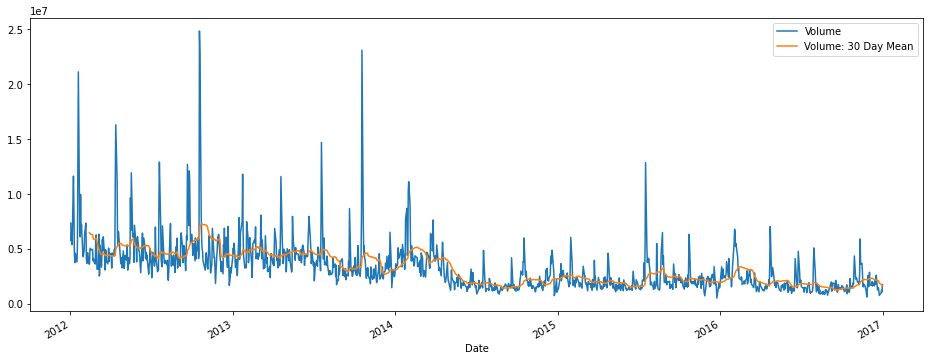

In [8]:
dataset['Volume: 30 Day Mean']=dataset["Volume"].rolling(window=30).mean()
dataset[['Volume','Volume: 30 Day Mean']].plot(figsize=(16,6))

In [9]:
train=dataset['Volume']
train=pd.DataFrame(train)

In [10]:
dataset.isna().any()

Open                   False
High                   False
Low                    False
Close                  False
Adj Close              False
Volume                 False
Volume: 30 Day Mean     True
dtype: bool

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train)

In [12]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
#2nd Part
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [14]:
#regressor
r=Sequential()

In [15]:
r.add(LSTM(units=50,return_sequences=True, input_shape = (x_train.shape[1],1)))


r.add(LSTM(units=50))


r.add(Dense(units=1))

In [39]:
r.compile(optimizer='adam', loss= 'mean_squared_error')

r.fit(x_train,y_train,epochs=1,batch_size=1,verbose=1)

1198/1198 [==============================] - 36s 23ms/step - loss: 0.0055


In [40]:
test=pd.read_csv('./gogle.csv',index_col="Date",parse_dates=True)

In [41]:
real_stock=test.iloc[:,5].values
print(test.iloc[:,5])

Date
2017-01-03    1959000
2017-01-04    1515300
2017-01-05    1340500
2017-01-06    2017100
2017-01-09    1408900
               ...   
2017-12-22     889400
2017-12-26     918800
2017-12-27    1116200
2017-12-28     994200
2017-12-29    1180300
Name: Volume, Length: 251, dtype: int64


In [42]:
test.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  800.619995  811.440002  796.890015  808.010010  808.010010   
2017-01-04  809.890015  813.429993  804.109985  807.770020  807.770020   
2017-01-05  807.500000  813.739990  805.919983  813.020020  813.020020   
2017-01-06  814.989990  828.960022  811.500000  825.210022  825.210022   
2017-01-09  826.369995  830.429993  821.619995  827.179993  827.179993   

             Volume  
Date                 
2017-01-03  1959000  
2017-01-04  1515300  
2017-01-05  1340500  
2017-01-06  2017100  
2017-01-09  1408900

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [44]:
test["Volume"]=test["Volume"].astype(float)

In [45]:
test_set=test['Volume']
test_set=pd.DataFrame(test_set)

In [46]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [47]:
dataset_total=pd.concat((dataset['Volume'],test['Volume']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=r.predict(x_test)
predicted_stock=sc.inverse_transform(predicted_stock)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       251 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


<AxesSubplot:>

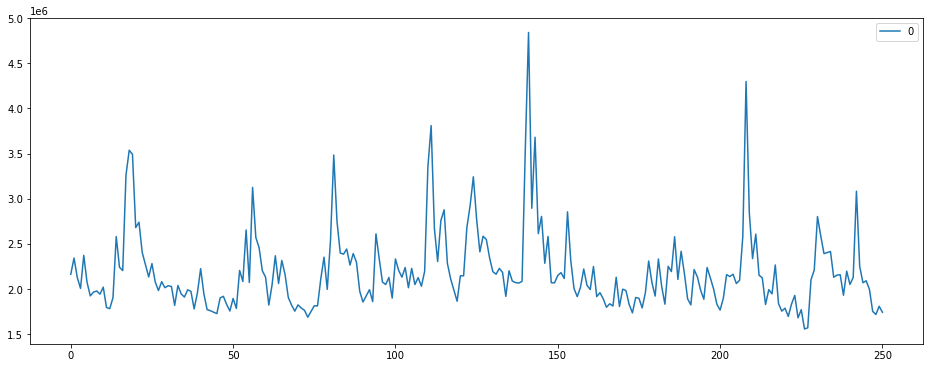

In [48]:
predicted_stock = pd.DataFrame(predicted_stock)
predicted_stock.info()
predicted_stock.plot(figsize=(16,6))

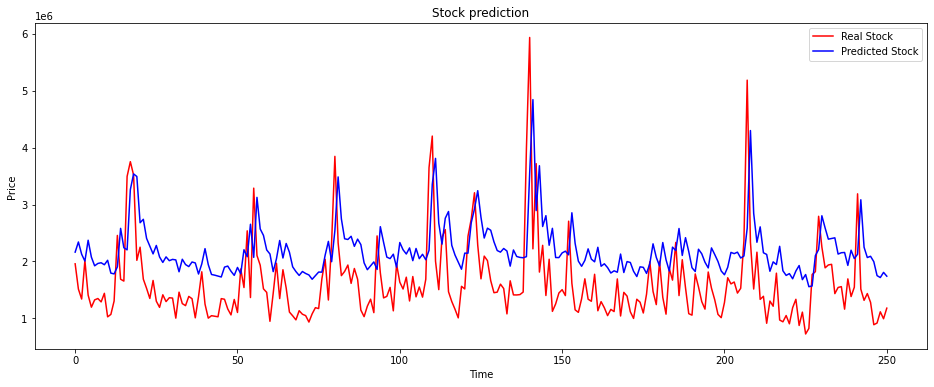

In [49]:
plt.figure(figsize=(16,6))
plt.plot(real_stock,color='red', label='Real Stock')
plt.plot(predicted_stock,color='blue', label="Predicted Stock")
plt.title("Stock prediction")

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
test.reset_index(drop=True, inplace=True)
test["Pred"]=predicted_stock
test[["Volume","Pred"]].head(20)

Volume         Pred
0   1959000.0  2163957.750
1   1515300.0  2342365.250
2   1340500.0  2127361.500
3   2017100.0  2006634.250
4   1408900.0  2372609.000
5   1197400.0  2075937.125
6   1325400.0  1923829.500
7   1349500.0  1965216.750
8   1290200.0  1977613.875
9   1440900.0  1942745.750
10  1027700.0  2020868.625
11  1070500.0  1795016.625
12  1306200.0  1781968.500
13  2457400.0  1904639.250
14  1688400.0  2581307.750
15  1655400.0  2240956.500
16  3493300.0  2204119.250
17  3752500.0  3262434.750
18  3516900.0  3537354.750
19  2020200.0  3492400.000